<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment%202/k_fold_Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Loading CIFAR-10 dataset

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import keras


#creating train,validate and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
#X_train, X_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.20,stratify=train_labels)#, random_state=42)

print(train_images.shape)
print(test_images.shape)


num_classes=10
# Convert class vectors to binary class matrices.
test_labels = keras.utils.to_categorical(test_labels, num_classes)
train_labels = keras.utils.to_categorical(train_labels, num_classes)




#function to create different k folds
def k_fold_dataset(i,train_images,train_labels):
  val_index_a=i*10000
  val_index_b=val_index_a+10000
  
  #splitting train images into train and val set
  #val set
  X_val=train_images[val_index_a:val_index_b]
  y_val=train_labels[val_index_a:val_index_b]
  
  #train set
  X_train=np.append(train_images[0:val_index_a],train_images[val_index_b:50000],axis=0)
  y_train=np.append(train_labels[0:val_index_a],train_labels[val_index_b:50000],axis=0)
  
  
  return X_train,y_train,X_val,y_val






(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
batch_size = 64
epochs = 30
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
#model_name = 'keras_cifar10_trained_model.h5'



from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler


#Model with 2 conv blocks and 4 conv layers with 2 fc layers and dropout
def model1():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model


#increased number of blocks/layers
def model2():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#no dropout
def model3():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model



#more filters , rest same as model 1
def model4():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#with batch normalization, and weight regulariser
def model5():
  
  weight_decay = 1e-4
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model
  
 

def train_model5(i,X_train,y_train,X_val,y_val,test_images,test_labels):

  #to vary learning during training
  def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate



  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

  # using SGD
  sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

  #using ADAM
  Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


  #using adgrad
  adagrad=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)


  #use mse as loss as well categorical_crossentropy


  #Calling model5
  model=model5()

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

 

  # option of data augmentation 
  if not data_augmentation:
      print('Not using data augmentation.')
      history=model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(X_val, y_val),
                shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True)

      datagen.fit(X_train)



      # Fit the model on the batches generated by datagen.flow().
      history=model.fit_generator(datagen.flow(X_train, y_train,
                                       batch_size=batch_size),
                          epochs=epochs,steps_per_epoch=len(X_train)/batch_size,
                          validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])



  # Score trained model.
  scores = model.evaluate(test_images, test_labels, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

  import matplotlib.pyplot as plt

  # list all data in history
  print(history.history.keys(),'\n\n\n')



  SMALL_SIZE = 16
  MEDIUM_SIZE = 18
  BIGGER_SIZE = 20

  plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
  plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
  #plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
  plt.rc('figure', titlesize=BIGGER_SIZE)

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  print('\n\n')

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()


  #finding confusion matrix and classification report
  from sklearn.metrics import classification_report, confusion_matrix
  import os
  from keras.models import load_model


  y_pred=model.predict(test_images) 
  y_pred = [np.argmax(entry) for entry in y_pred]
  y_true = [np.argmax(entry) for entry in test_labels]

  print('Confusion Matrix\n\n')
  print(confusion_matrix(y_true, y_pred))  

  print(classification_report(y_pred,y_true))

(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 10)
Using real-time data augmentation.
Epoch 1/30
625/625 [==============================] - 39s 62ms/step - loss: 1.9949 - acc: 0.4019 - val_loss: 1.9046 - val_acc: 0.4873
Epoch 2/30
625/625 [==============================] - 35s 56ms/step - loss: 1.3302 - acc: 0.5689 - val_loss: 1.1654 - val_acc: 0.6375
Epoch 3/30
625/625 [==============================] - 34s 54ms/step - loss: 1.1285 - acc: 0.6348 - val_loss: 1.0532 - val_acc: 0.6830
Epoch 4/30
625/625 [==============================] - 33s 53ms/step - loss: 1.0216 - acc: 0.6729 - val_loss: 0.9722 - val_acc: 0.7059
Epoch 5/30
625/625 [==============================] - 34s 55ms/step - loss: 0.9498 - acc: 0.7006 - val_loss: 0.7545 - val_acc: 0.7728
Epoch 6/30
625/625 [==============================] - 34s 54ms/step - loss: 0.9015 - acc: 0.7219 - val_loss: 0.7952 - val_acc: 0.7606
Epoch 7/30
625/625 [==============================] - 33s 53ms/step - los

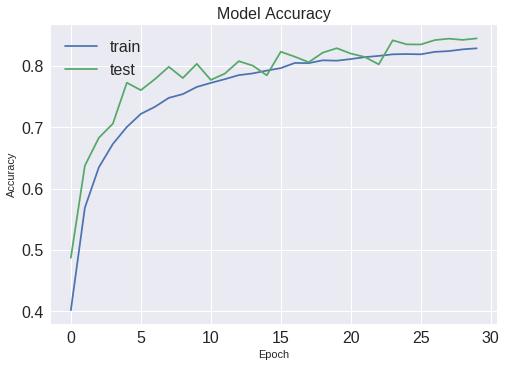

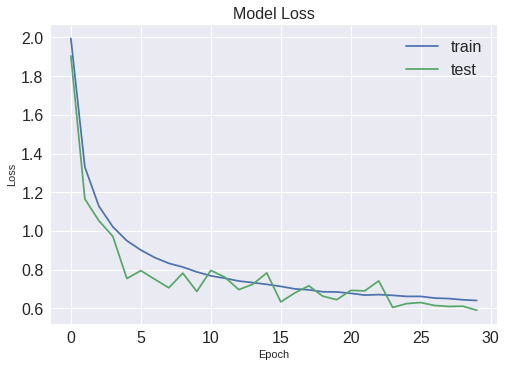

Confusion Matrix


[[877   6  29   1  18   4   3   3  23  36]
 [ 11 921   0   0   1   0   1   1   5  60]
 [ 39   1 786   5  37  48  59  11   2  12]
 [ 25   4  40 468  42 231 115  39   9  27]
 [  7   1  36   4 836  31  63  19   0   3]
 [  5   1  21  24  26 858  24  34   0   7]
 [  6   1  15   9   6   7 950   1   3   2]
 [  8   0  11   3  32  28   5 903   0  10]
 [ 43  13   3   0   1   2   7   2 882  47]
 [  8  20   1   2   0   1   2   1   1 964]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1029
           1       0.92      0.95      0.94       968
           2       0.79      0.83      0.81       942
           3       0.47      0.91      0.62       516
           4       0.84      0.84      0.84       999
           5       0.86      0.71      0.78      1210
           6       0.95      0.77      0.85      1229
           7       0.90      0.89      0.90      1014
           8       0.88      0.95      0.92       925
         

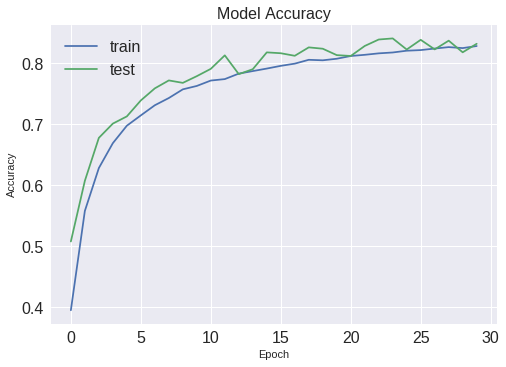

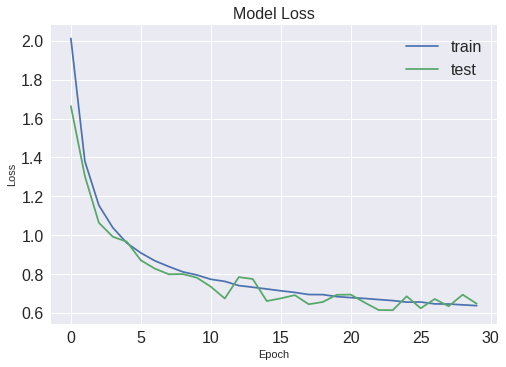

Confusion Matrix


[[813  23  22   2  19   3   5   5  44  64]
 [  1 932   0   0   1   0   3   0   6  57]
 [ 41   3 792   6  55  11  56   8   4  24]
 [ 18  11  49 577  83  78  97  30  20  37]
 [  7   0  29  10 894   4  35  15   2   4]
 [  8   7  31  81  79 670  45  48  10  21]
 [  8   0  25  12  11   0 938   1   2   3]
 [  5   2   8   6  62  10  20 871   2  14]
 [ 31  16   3   0   4   0   9   0 901  36]
 [  5  29   2   3   0   0   0   0   7 954]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       937
           1       0.93      0.91      0.92      1023
           2       0.79      0.82      0.81       961
           3       0.58      0.83      0.68       697
           4       0.89      0.74      0.81      1208
           5       0.67      0.86      0.75       776
           6       0.94      0.78      0.85      1208
           7       0.87      0.89      0.88       978
           8       0.90      0.90      0.90       998
         

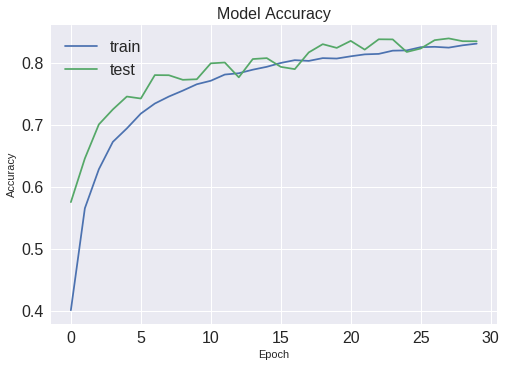

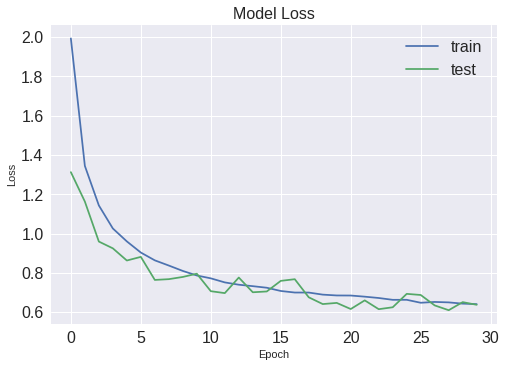

Confusion Matrix


[[883  12  39   0  13   1   4   6  24  18]
 [  7 961   0   0   2   0   4   0   5  21]
 [ 37   1 779   6  78  12  62  15   5   5]
 [ 30  14  53 490 120  91 142  28  16  16]
 [ 12   1  22   3 891   4  43  21   3   0]
 [ 11   2  42  56  74 688  63  54   4   6]
 [  4   4  13   3  22   0 948   3   1   2]
 [ 14   1  14   6  62  14  16 867   1   5]
 [ 53  18   5   2   5   0   5   1 896  15]
 [ 21  61   4   0   2   0   6   2   9 895]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1072
           1       0.96      0.89      0.93      1075
           2       0.78      0.80      0.79       971
           3       0.49      0.87      0.63       566
           4       0.89      0.70      0.79      1269
           5       0.69      0.85      0.76       810
           6       0.95      0.73      0.83      1293
           7       0.87      0.87      0.87       997
           8       0.90      0.93      0.91       964
         

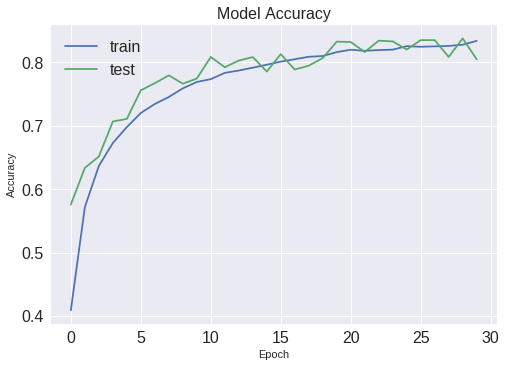

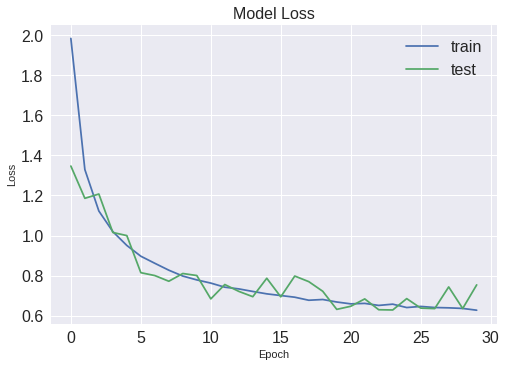

Confusion Matrix


[[854  12  28   1  22   0  21   5  33  24]
 [  7 926   0   0   1   0  15   0   9  42]
 [ 51   0 694  11  86  18 121   8   3   8]
 [ 14   4  39 551  87  54 214  15  11  11]
 [ 10   0  20   6 861   2  91   7   3   0]
 [  3   4  34  89  97 562 169  28   6   8]
 [  4   0   7   3  11   0 973   1   1   0]
 [ 14   0  13   8 124   6  57 770   2   6]
 [ 40  15   4   1   5   0  14   0 905  16]
 [  8  40   4   3   2   0  21   0  12 910]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1005
           1       0.93      0.93      0.93      1001
           2       0.69      0.82      0.75       843
           3       0.55      0.82      0.66       673
           4       0.86      0.66      0.75      1296
           5       0.56      0.88      0.68       642
           6       0.97      0.57      0.72      1696
           7       0.77      0.92      0.84       834
           8       0.91      0.92      0.91       985
         

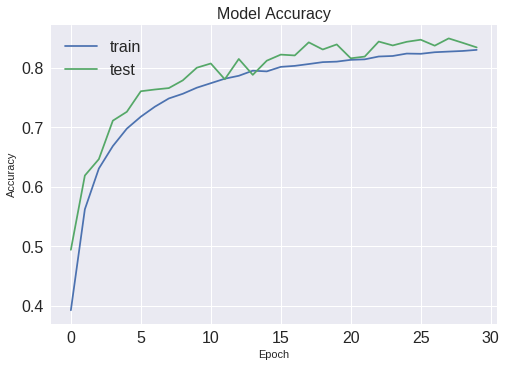

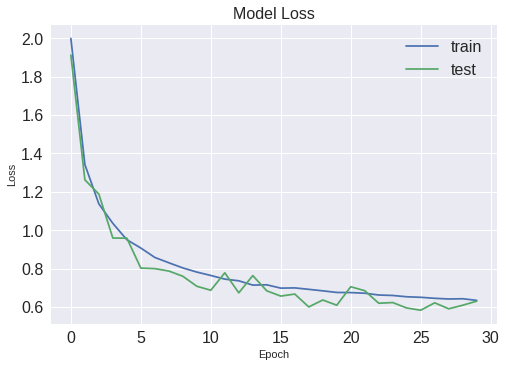

Confusion Matrix


[[815  15  10   8   6   2   1   9  57  77]
 [  2 910   0   1   0   0   2   0   6  79]
 [ 56   6 698  38  70  20  61  28   6  17]
 [  8  11  14 723  54  36  65  40  16  33]
 [  5   1  18  22 861   2  31  47  10   3]
 [  5   7  13 204  48 600  38  57   5  23]
 [  7   5   8  32   8   0 924   3   8   5]
 [  7   3   4  19  23   8   9 910   3  14]
 [ 29   8   0   4   1   0   1   1 919  37]
 [  7  20   0   3   0   0   1   0   5 964]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       941
           1       0.91      0.92      0.92       986
           2       0.70      0.91      0.79       765
           3       0.72      0.69      0.70      1054
           4       0.86      0.80      0.83      1071
           5       0.60      0.90      0.72       668
           6       0.92      0.82      0.87      1133
           7       0.91      0.83      0.87      1095
           8       0.92      0.89      0.90      1035
         

In [10]:
test_images=(test_images-mean)/(std+1e-7)

for a in range(0,5):
    X_train,y_train,X_val,y_val=k_fold_dataset(a,train_images,train_labels)
    
    #finding mean and normalizing 
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train,axis=(0,1,2,3))
    X_train = (X_train-mean)/(std+1e-7)
    X_val=(X_val-mean)/(std+1e-7)
    

    
    #y_train = keras.utils.to_categorical(y_train, num_classes)
    #y_val=keras.utils.to_categorical(y_val, num_classes)
    
    print(train_images.shape)
    print(X_train.shape)
    print(X_val.shape)
    print(test_images.shape)  
    print(y_val.shape)
    
    train_model5(a,X_train,y_train,X_val,y_val,test_images, test_labels)


In [0]:
# average of k-fold accuracy as seen above in the classification reports

k1=85
k2=84
k3=83
k4=81
k5=83


#Saving the model as an h5 file

good_model='adam_batch-normalization-dropout_k-fold_out.h5'
model.save(good_model)

from google.colab import files

with open(good_model, 'r') as f:
  files.download(good_model)

In [15]:
#printing the f1, microavg scores per fold

print('k1 Test accuracy : ', k1,'%')
print('k2 Test accuracy : ', k2,'%')
print('k3 Test accuracy : ', k3,'%')
print('k4 Test accuracy : ', k4,'%')
print('k5 Test accuracy : ', k5,'%')

avg=(k1+k2+k3+k4+k5)/5
print('\n')
print('Avg score using k fold validation is ' ,avg,'% after 30 epochs for each test set')

k1 Test accuracy :  85 %
k2 Test accuracy :  84 %
k3 Test accuracy :  83 %
k4 Test accuracy :  81 %
k5 Test accuracy :  83 %


Avg score using k fold validation is  83.2 % after 30 epochs for each test set


In [0]:
!ls

sample_data
